## Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load cleaned dataset
df =pd.read_csv('datasets/Algerian_forest_fires_dataset_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [181]:
# Drop day, month, year, and Region
df.drop(['day', 'month', 'year', 'Region'], axis=1, inplace=True)

For the purpose of this model training using regression analysis, the dependent feature will be the Fire Weather Index (FWI)

In [182]:
## Independent features and dependent feature
X = df.drop(['FWI', 'Classes'], axis=1)  # Independent features
y = df['FWI']                            # Dependent feature

In [183]:
# Train Test split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

<Axes: >

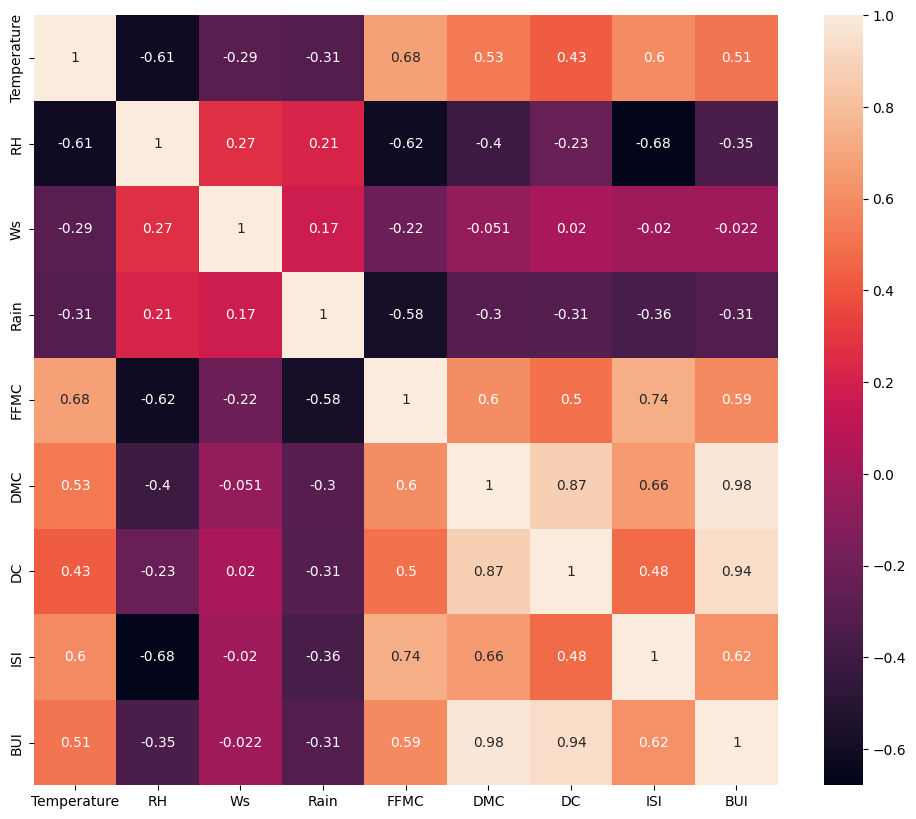

In [184]:
# Check for multicolinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

Highly positive correlated columns should be removed from the dataset. However, the threshold for the cut off is usually set by the domain expert. For this model training, we will set the threshold at 0.85. Any columns above this threshold will be removed.

In [185]:
# Fucntion to remove columns above threshold
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

Both columns BUI and DC will be removed from the dataset.

In [186]:
## Drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

## Feature scaling or standardization

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

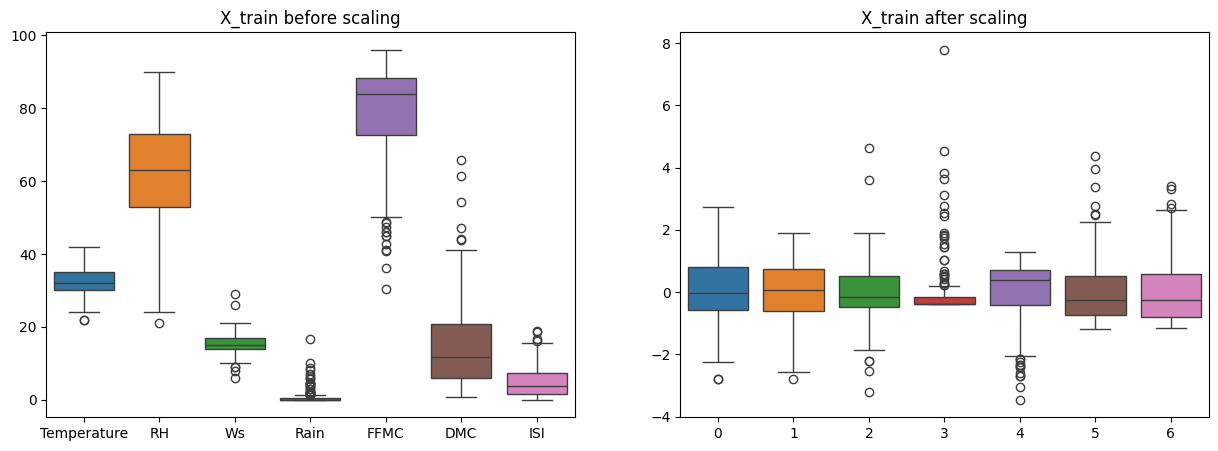

In [188]:
## Box plots to understand effect of standardization
plt.subplots(1,2, figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

# MODEL TRAINING

## Linear Regression Model

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def linear():
    linreg = LinearRegression()
    linreg.fit(X_train_scaled,y_train)
    y_pred = linreg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    return [linreg, mse, mae, score, y_pred]
r1 = linear()

## Lasso Regression


In [190]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def lasso():
    lassoReg = Lasso()
    lassoReg.fit(X_train_scaled, y_train)
    y_pred = lassoReg.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    return [lassoReg, mse, mae, score, y_pred]
r2 = lasso()

## Cross Validation Lasso

In [191]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def lassoCV():
    lassocv = LassoCV(cv=5)
    lassocv.fit(X_train_scaled, y_train)
    y_pred = lassocv.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    alpha = lassocv.alpha_
    cv = lassocv.get_params()['cv']
    return [lassocv, mse, mae, score, cv, alpha, y_pred]
r3 = lassoCV()

## Ridge Regression

In [192]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def ridgeRegression():
    ridge = Ridge()
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    return [ridge, mse, mae, score, y_pred]
r4 = ridgeRegression()

## Cross Validation Ridge

In [193]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def ridgeCV():
    ridgecv = RidgeCV(cv=5)
    ridgecv.fit(X_train_scaled, y_train)
    y_pred = ridgecv.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    alpha = ridgecv.alpha_
    cv = ridgecv.get_params()['cv']
    return [ridgecv, mse, mae, score, cv, alpha, y_pred]
r5 = ridgeCV()

## ElasticNet Regression

In [194]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def elasticNet():
    elastic = ElasticNet()
    elastic.fit(X_train_scaled, y_train)
    y_pred = elastic.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    return [elastic, mse, mae, score, y_pred]
r6 = elasticNet()

## Cross Validation ElasticNet

In [195]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def elasticNetCV():
    elasticCV = ElasticNetCV(cv=5)
    elasticCV.fit(X_train_scaled, y_train)
    y_pred = elasticCV.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    alpha = elasticCV.alpha_
    cv = elasticCV.get_params()['cv']
    return [elasticCV, mse, mae, score, cv, alpha, y_pred]
r7 = elasticNetCV()

In [ ]:
# Create a dataframe to store all the regression models and their parameters
columns = ['MSE', 'MAE', 'Accuracy', 'CV', 'Alpha']
index = ['Linear', 'Lasso', 'Lasso CV', 'Ridge', 'Ridge CV', 'ElasticNet', 'ElastciNet CV']
records = [r1[1:-1], r2[1:-1], r3[1:-1], r4[1:-1], r5[1:-1], r6[1:-1], r7[1:-1]]
models = [r1[0], r2[0], r3[0], r4[0], r5[0], r6[0], r7[0]]

regression_models = pd.DataFrame(records, index=index, columns=columns)
regression_models_sorted = regression_models.sort_values(by=['Accuracy'], ascending=False)
regression_models_sorted


,MSE,MAE,Accuracy,CV,Alpha
Linear,0.784776,0.640096,0.987797,NaN,NaN
Ridge,0.804487,0.651719,0.987490,NaN,NaN
Ridge CV,0.804487,0.651719,0.987490,5.0,1.000000
Lasso CV,0.835023,0.673388,0.987015,5.0,0.033033
ElastciNet CV,0.853714,0.679536,0.986725,5.0,0.023197
Lasso,3.001314,1.245003,0.953329,NaN,NaN
ElasticNet,7.287109,2.100500,0.886684,NaN,NaN


## Scatter plots for all models : True points vs Predicted points

Text(0.5, 1.0, 'Elastic CV regression prediction')

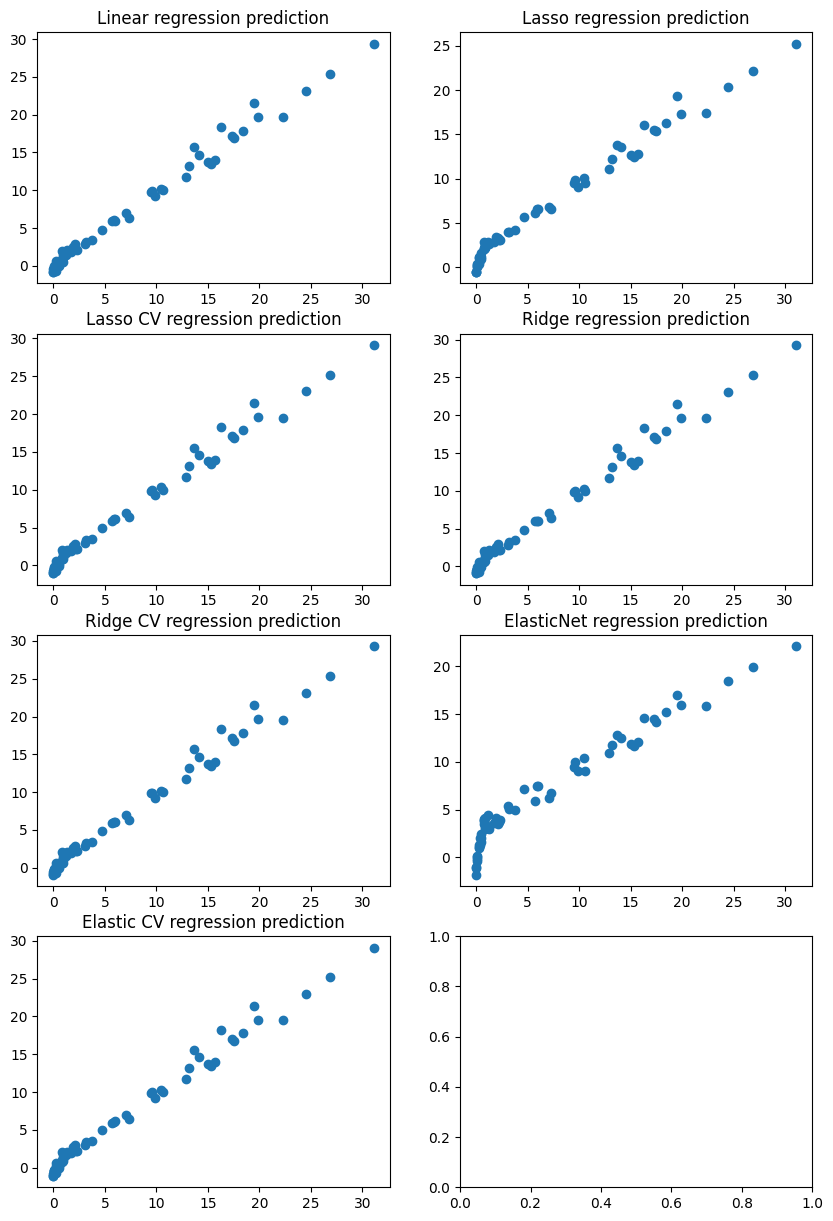

In [197]:
plt.subplots(4, 2, figsize=(10, 15))
plt.subplot(4,2,1)
plt.scatter(y_test, r1[-1])
plt.title("Linear regression prediction")
plt.subplot(4,2,2)
plt.scatter(y_test, r2[-1])
plt.title("Lasso regression prediction")
plt.subplot(4,2,3)
plt.scatter(y_test, r3[-1])
plt.title("Lasso CV regression prediction")
plt.subplot(4,2,4)
plt.scatter(y_test, r4[-1])
plt.title("Ridge regression prediction")
plt.subplot(4,2,5)
plt.scatter(y_test, r5[-1])
plt.title("Ridge CV regression prediction")
plt.subplot(4,2,6)
plt.scatter(y_test, r6[-1])
plt.title("ElasticNet regression prediction")
plt.subplot(4,2,7)
plt.scatter(y_test, r7[-1])
plt.title("Elastic CV regression prediction")

## Predict new data

In [203]:
import warnings
warnings.filterwarnings('ignore')

def predict_new_data(data: list):
    y_preds = [model.predict(data)[0] for model in models]
    regression_models['Predicted FWI'] = y_preds
    regression_models_sorted = regression_models.sort_values(by=['Accuracy'], ascending=False)
    return regression_models_sorted

data = scaler.transform([[29, 57, 18, 0.0, 65.7, 3.4, 1.3]])
data1 = scaler.transform([[31, 65, 14, 0, 84.5, 12.5, 4]])
data2 = scaler.transform([[28, 58, 18, 2.2, 63.7, 3.2, 1.2]])
print(predict_new_data(data=data))
print(predict_new_data(data=data1))
print(predict_new_data(data=data2))

                    MSE       MAE  Accuracy   CV     Alpha  Predicted FWI
Linear         0.784776  0.640096  0.987797  NaN       NaN       0.119051
Ridge          0.804487  0.651719  0.987490  NaN       NaN       0.169268
Ridge CV       0.804487  0.651719  0.987490  5.0  1.000000       0.169268
Lasso CV       0.835023  0.673388  0.987015  5.0  0.033033       0.191898
ElastciNet CV  0.853714  0.679536  0.986725  5.0  0.023197       0.249248
Lasso          3.001314  1.245003  0.953329  NaN       NaN       1.220987
ElasticNet     7.287109  2.100500  0.886684  NaN       NaN       2.061255
                    MSE       MAE  Accuracy   CV     Alpha  Predicted FWI
Linear         0.784776  0.640096  0.987797  NaN       NaN       5.307476
Ridge          0.804487  0.651719  0.987490  NaN       NaN       5.327378
Ridge CV       0.804487  0.651719  0.987490  5.0  1.000000       5.327378
Lasso CV       0.835023  0.673388  0.987015  5.0  0.033033       5.360063
ElastciNet CV  0.853714  0.679536  0.9

## Pickle the machine models, preprocessing model using standardization

Since both Ridge and RidgeCV models performs best aside from the Linear regression model, we will pick the Ridge CV model for future predictions.

In [200]:
import pickle
regression_model = r5[0]
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(regression_model, open('ridgeCV.pkl', 'wb'))